# Algoritmo de clusterización K-Means

## ¿Cómo funciona el algoritmo?
El algoritmo trabaja iterativamente para asignar a cada registro (un punto en un plano multidimensional) a uno de los *K* centros basándose en sus características (columnas). Como resultado del algoritmos, tendremos:
* Los *centroides* de cada grupo. Estos "puntos" son generados (y ajustados) por el algoritmo. Se utilizan para determinar si un registro pertenece a un grupo (o cluster). Entre más "cerca" esté el registro del *centroide* más pertenece a ese grupo.
* Etiquetas para cada uno de los grupos (o clusteres).

Los grupos se van definiendo a lo largo de cada iteración, hasta que converge. Una vez hallados los *centroides*. Una vez hallados los *centroides*, deberemos analizar para ver cuales son sus características únicas, frente a la de los otros grupos.

## Casos de uso de K-Means

El algoritmo K-Means es uno de los más usados para encontrar grupos ocultos (o sospechados) sobre un conjunto de datos no etiquetados. Esto puede servir para confirmar -o desechar- alguna teoría que tuviéramos sobre nuestros datos. Además, puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos detectado. Una vez que el algoritmo ha terminado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

Algunos ejemplos de casos de uso:
* Segmentación por comportamiento: Relacionar el carrito de compras de un usuarios, sus tiempos de acción e información de perfil.
* Categorización de inventario: Agrupar productos por actividad en sus ventas.
* Detectar anomalías o actividades sospechosas: Según el comportamiento es una web reconocer un "troll" (o un bot) de un usuario normal.

## Datos de entrada 

Como ya hemos indicado antes, el algoritmo utiliza un proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo, deberemos pasar como entradas el conjunto de datos y un valor de *K*. El conjunto de datos serán las características para cada punto. Las posiciones iniciales de los *K* serán generados de manera aleatoria. A continuación, se realizan los siguientes pasos:
1. Asignación de datos. En este paso, cada registro de nuestro conjunto de datos se asigna al *centroide* más cercano basándose en la distancia cuadrada Euclidiana.
2. Actualización del *centroide*. En este paso, el *centroide* de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

El algoritmo realiza estos pasos hasta que se cumple algunos de los siguientes criterios:
* No hay cambios en los puntos asignados a los grupos.
* La suma de la distancias se minimiza.
* Se alcanza un número máximo de iteraciones.

El algoritmos converge (termina) a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con sus puntos iniciales aleatorios para confirmar si hay una salida mejor.

## Elegir el valor de *K*

Enste algoritmo requiere de un valor de *K* determinado. Para encontrar este valor, deberemos ejecutar el algoritmo sobre un rango de valore *K*, ver los resultados y comparar características de los grupos obtenidos. En generar, no existe una forma exacta de determinar el valor de *K*, pero se puede estimar empleando la siguiente técnica.

Una de las métricas usadas para comparar los resultados es la distancia media entre los puntos y su *centroide*. Como el valor de la media disminuirá a medida que aumentemos el valor de *k*, deberemos utilizar esta medida para encontrar el "punto codo", donde la tasa de descenso se "afila" (ver Figura 1).
![Figura 1](images/image01.png)

## Ejemplo de K-Means

Utilizaremos de entrada un conjunto de datos que analiza rasgos de la personalidad de usuarios "famosos" de Twitter. El conjunto de datos tiene las siguientes características:
* Usuario: nombre en Twitter.
* op: Grado de apertura mental a nuevas experiencias (Openness to experience).
* co: Grado de exactitud, espero y minuciosidad con que se efectúan las cosas (Conscientiousness).
* ex: Tendencia de la persona sociable a comunicar a los demás sus sentimientos (Extraversion).
* ag: Grado de empatía con los demás (Agreeableness).
* ne: Grado de irritabilidad (Neutoricism).
* wordcount: Cantidad promedio de palabras usadas en sus tweets.
* category: Actividad laboral del usuario (actor, cantantante, etc.)

Utilizaremos el algoritmos de KMeans para agrupar estos usuarios, no por sus actividad laboral, si no, por sus similitudes de personalidad. Si bien tenemos 8 columnas de entrada, solo utilizaremos 3. De este modo, podremos ver en un gráfico tridimensional, y sus proyecciones en 2D, los grupos resultantes. Una de las hipótesis que podríamos tener es: "Todos futbolistas tienen una personalidad parecida" (o cualquier otra actividad laboral).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../datasets/kmeans.csv')
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [3]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


Las categorias son:
1. Actor/actriz.
2. Cantante.
3. Modelo.
4. TV, Series.
5. Radio.
6. Tecnología.
8. Política.
9. Escritor.

Agrupamos por categoría para determinar cuantos registros tenemos de cada uno:

In [5]:
print(df.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Analicemos gráficamente nuestros datos para tener una idea de la dispersión de los mismos.

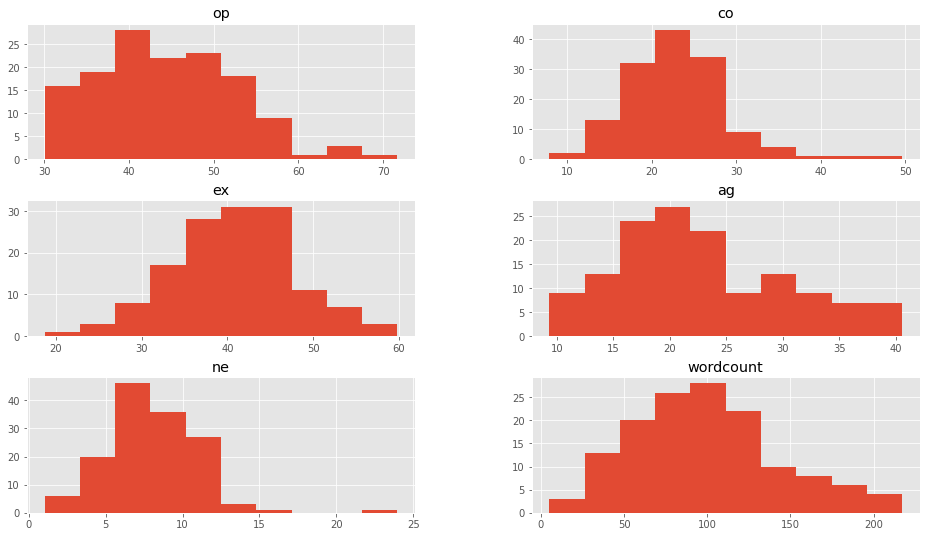

In [10]:
df.drop(['categoria'], axis='columns').hist()
plt.show()

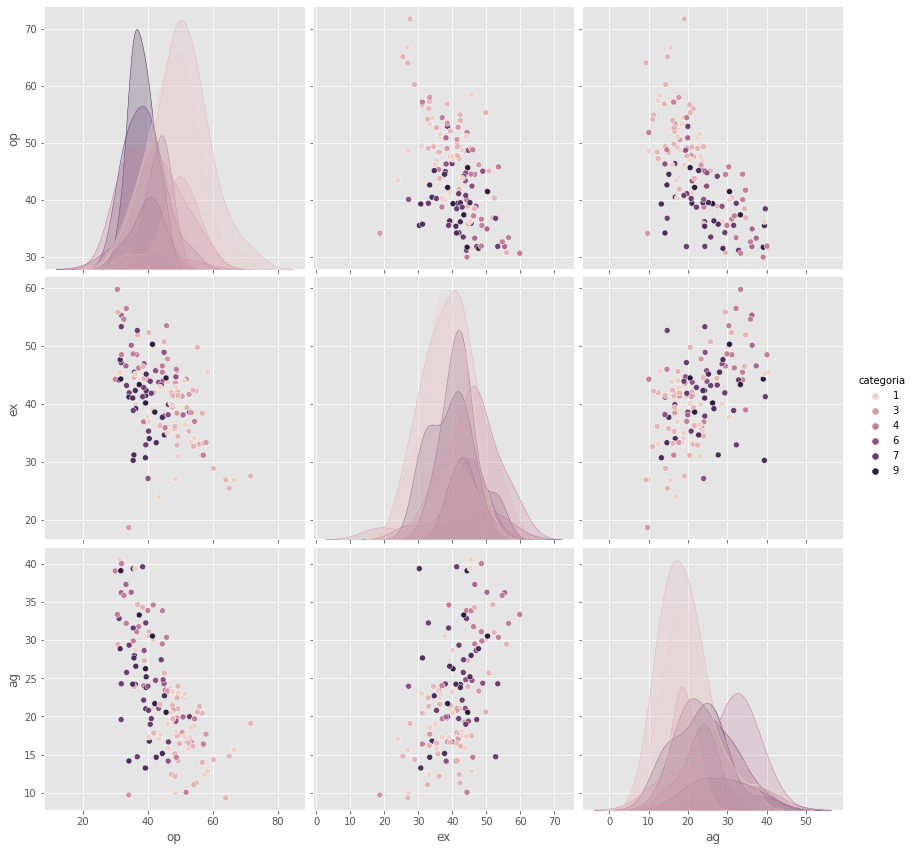

In [12]:
sb.pairplot(df.dropna(), hue='categoria', height=4, vars=["op","ex","ag"], kind='scatter')

Extraeremos las tres métricas seleccionadas.

In [14]:
X = np.array(df[['op', 'ex', 'ag']])
y = np.array(df['categoria'])
X.shape

(140, 3)

A continuación, graficaremos nuestros datos en 3D.

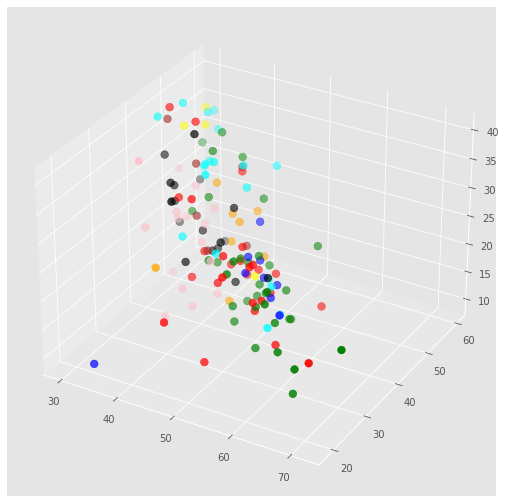

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
colors=['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
assign=[]
for row in y:
    assign.append(colors[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign, s=60)

Como se mencionó antes, lo primero será hallar un valor adeacuado para *K* empleando el algoritmo de "punto de codo".

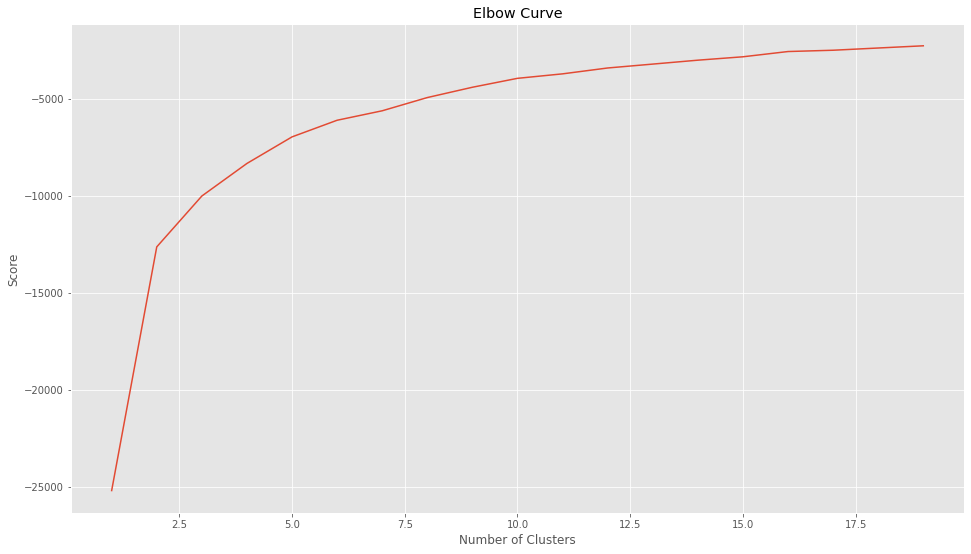

In [22]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Como podemos observar, la curva es muy "suave". Tomaremos a 5 como buen valor para *K*. Bueno, ejecutemos el algoritmo para 5 grupos.

In [23]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[35.17396457 47.06020607 34.6411185 ]
 [57.92200861 31.5039735  15.67199517]
 [49.6606333  41.17669023 17.548775  ]
 [42.66891482 33.31008136 21.11530482]
 [39.54481575 45.07416312 24.68934297]]


Ahora veremos estos en una gráfica 3D con colores para los grupos y veremos si los grupos se diferencian. Colocaremos unas estrellas para marcar el centro de cada grupo.

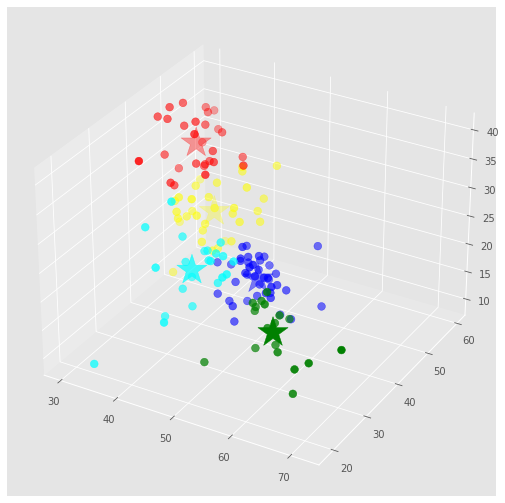

In [28]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green','blue','cyan','yellow']
assign=[]
for row in labels:
    assign.append(colors[row])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)

Algunas veces puede ser difícil analizar la información en 3D, así que heremos 3 gráficas en 2 dimensiones con las proyecciones de nuestra gráfica en 3D. Esto nos ayudará a visualizar los grupos y su clasificación.

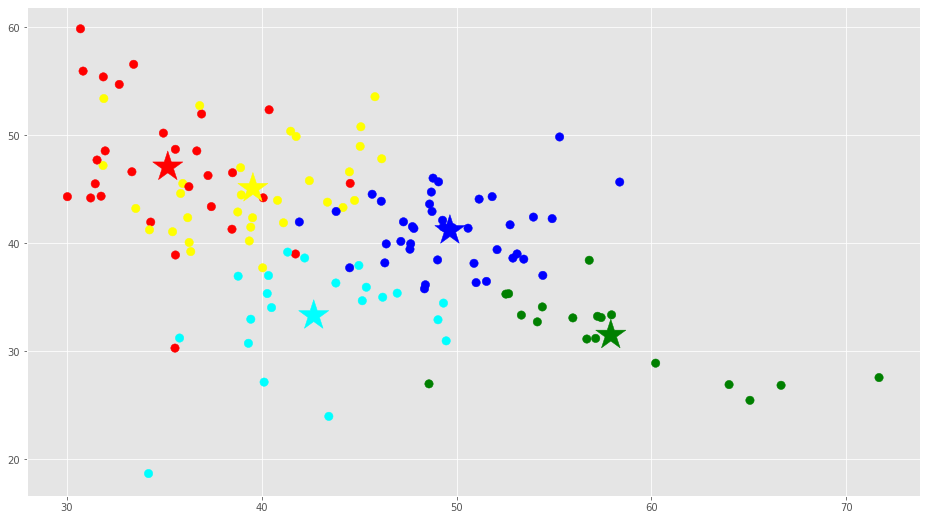

In [29]:
# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ex'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.show()

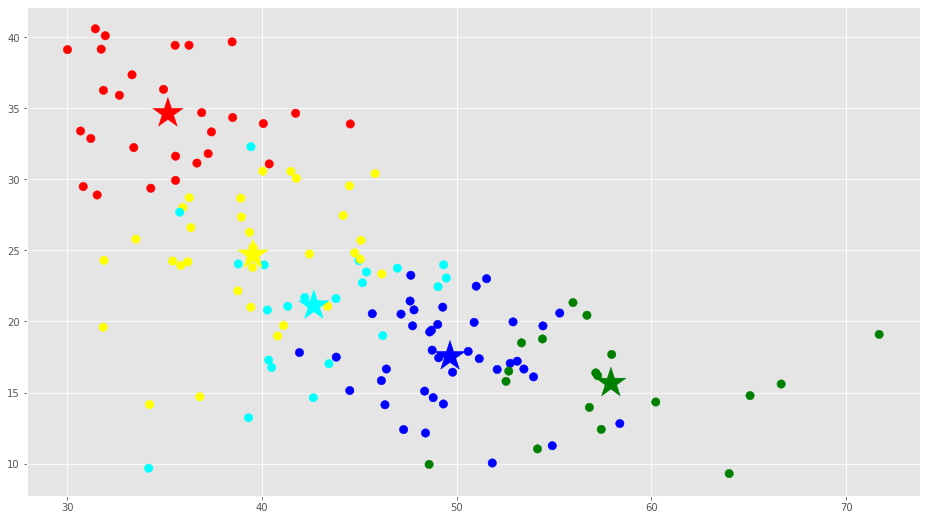

In [32]:
# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ag'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

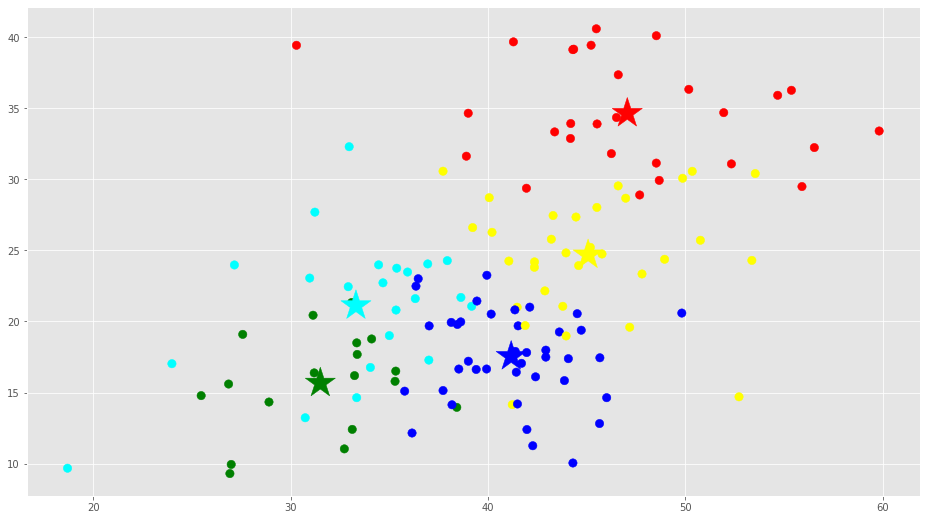

In [33]:
f1 = df['ex'].values
f2 = df['ag'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

Veamos cuantos usuarios tienen cada grupo:

In [35]:
copy =  pd.DataFrame()
copy['user']=df['usuario'].values
copy['category']=df['categoria'].values
copy['label'] = labels;
amountByGroup =  pd.DataFrame()
amountByGroup['color']=colors
amountByGroup['amount']=copy.groupby('label').size()
amountByGroup

,color,amount
0,red,28
1,green,18
2,blue,40
3,cyan,22
4,yellow,32


Revisemos la diversidad de rubros laborales que hay en cada grupo. Por ejemplo, analicemos el grupo 0. Recuerda que las categorias son:
1. Actor/actriz.
2. Cantante.
3. Modelo.
4. TV, Series.
5. Radio.
6. Tecnología.
8. Política.
9. Escritor.

In [37]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversityGroup =  pd.DataFrame()
diversityGroup['category']=[0,1,2,3,4,5,6,7,8,9]
diversityGroup['amount']=group_referrals.groupby('category').size()
diversityGroup

,category,amount
0,0,NaN
1,1,2.0
2,2,4.0
3,3,NaN
4,4,11.0
5,5,3.0
6,6,NaN
7,7,4.0
8,8,2.0
9,9,2.0
